# Coral Conundrum

Coral reef fish are colorful and diverse species that live in and around coral reefs, playing important roles in keeping these ecosystems healthy.

Why did the word usage frequency of most `coral reef fish` species drop sharply around `1998`? 

Could it be linked to the UN's designation of 1998 as the `International Year of the Ocean`, a major coral bleaching event, or the internet's rapid growth after Google's launch?

This project will explore various factors that might explain this decline in word frequency, encouraging you to discover potential explanations we haven't yet considered.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('animal-word-trends-coral-conundrum.csv')
df

,year,word,frequency
0,1900,angelfish,0.003158
1,1900,bannerfish,0.000015
2,1900,blenny,0.052464
3,1900,butterflyfish,0.000232
4,1900,damselfish,0.000000
...,...,...,...
3128,2019,surgeonfish,0.013411
3129,2019,triggerfish,0.021962
3130,2019,trumpetfish,0.002598
3131,2019,unicornfish,0.001246


### Exploring Word Trends for Coral Reef Fish

We have provided a function to plot the word usage for different coral reef fish. Create different plots. What trends do you observe?

In [2]:
word_list = df['word'].unique()
word_list

array(['angelfish', 'bannerfish', 'blenny', 'butterflyfish', 'damselfish',
       'filefish', 'frogfish', 'goatfish', 'lionfish', 'lizardfish',
       'needlefish', 'parrotfish', 'pipefish', 'porcupinefish',
       'rabbitfish', 'scorpionfish', 'sharksucker', 'soldierfish',
       'squirrelfish', 'surgeonfish', 'triggerfish', 'trumpetfish',
       'wrasse', 'hawkfish', 'cornetfish', 'unicornfish', 'anemonefish'],
      dtype=object)

In [3]:
def plot_word_trend( animal ):
    trend = df.query('word == @animal')
    plt.figure(figsize=(5, 3))
    plt.plot(trend['year'], trend['frequency'], label=animal)
    plt.ylabel('Frequency per million')
    plt.title(f"'{animal}' and the year 1998")
    plt.axvline(1998, color='orange', ls='--')

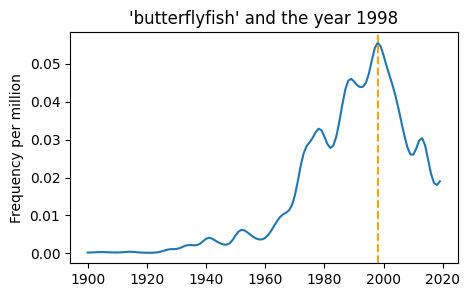

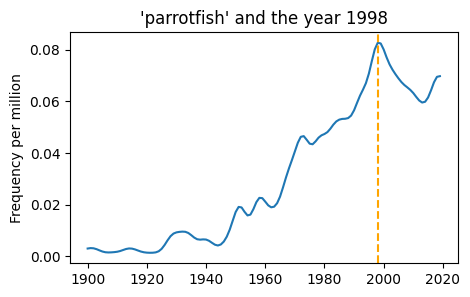

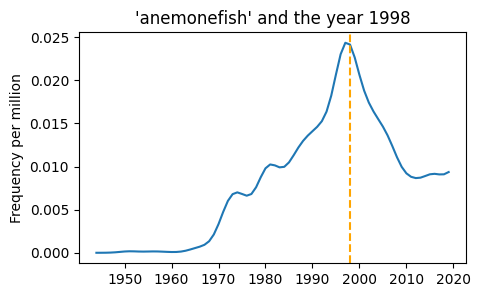

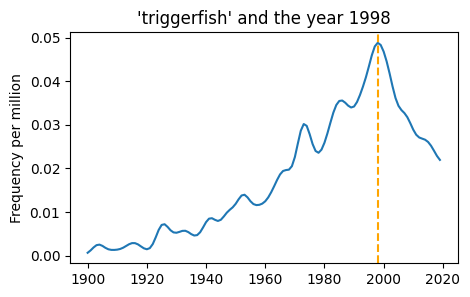

In [4]:
plot_word_trend('butterflyfish')
plot_word_trend('parrotfish')
plot_word_trend('anemonefish')
plot_word_trend('triggerfish')

/var/folders/yr/1zq8t0xn47v5vkb50984lgjw0000gp/T/ipykernel_38082/4097871843.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 3))


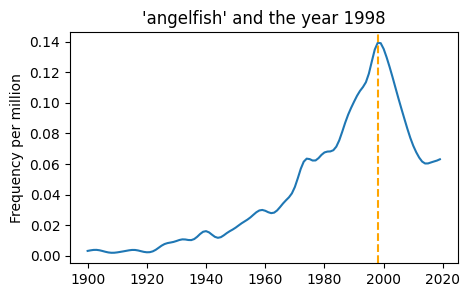

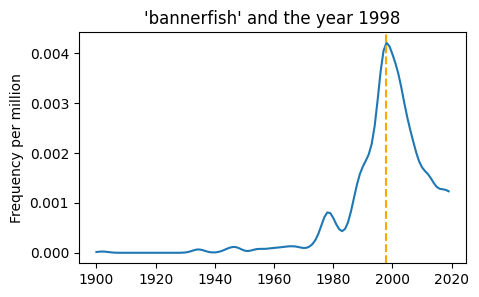

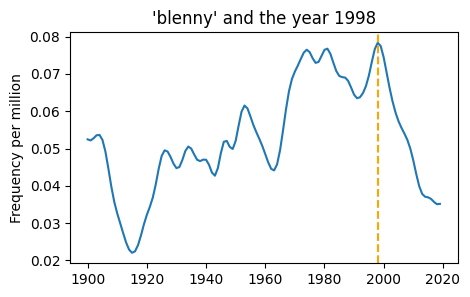

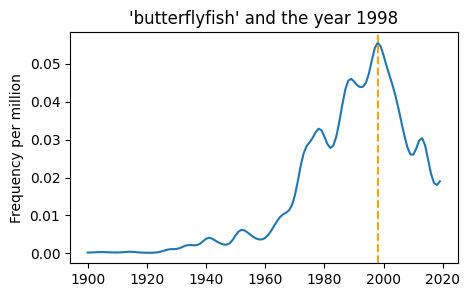

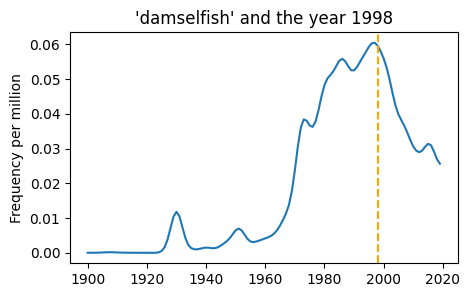

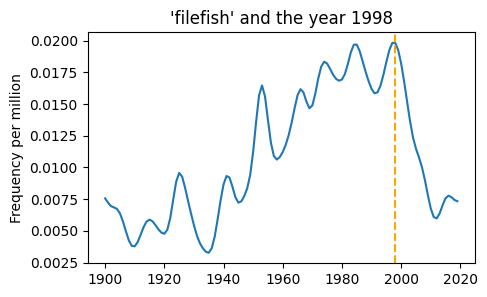

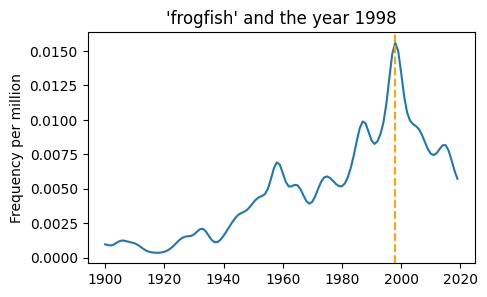

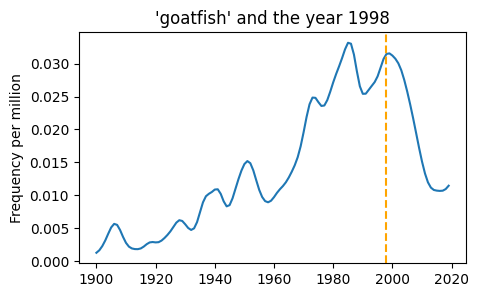

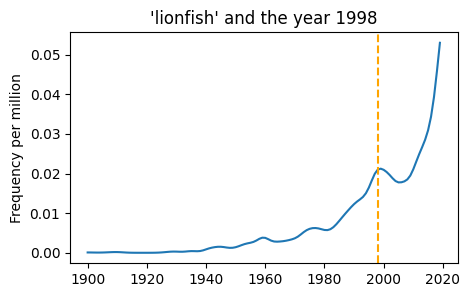

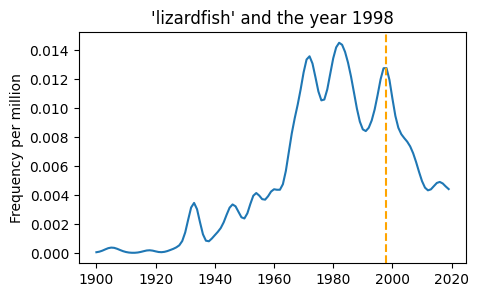

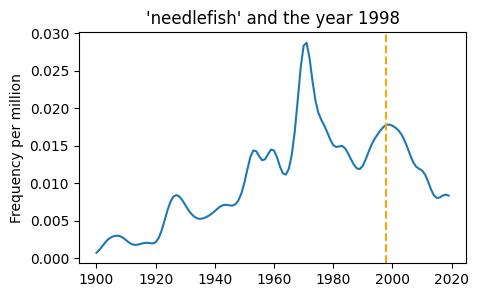

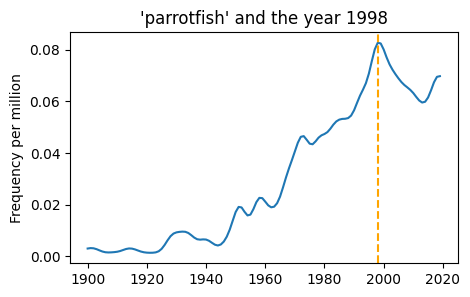

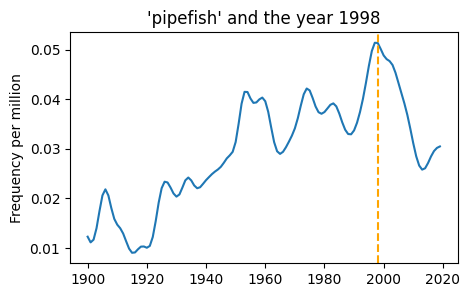

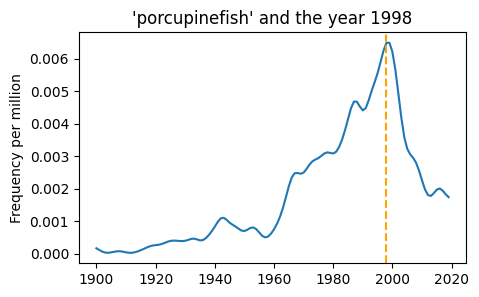

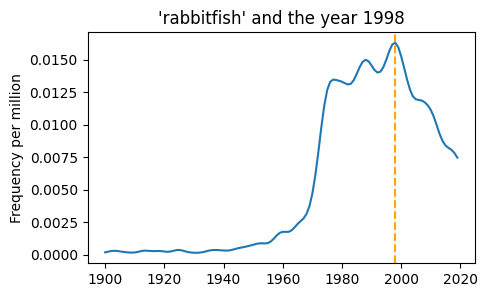

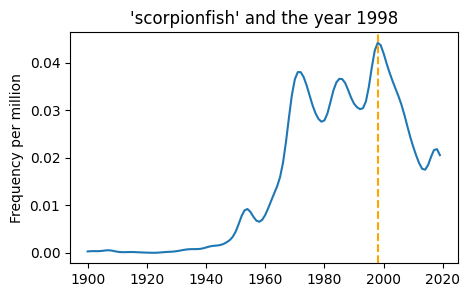

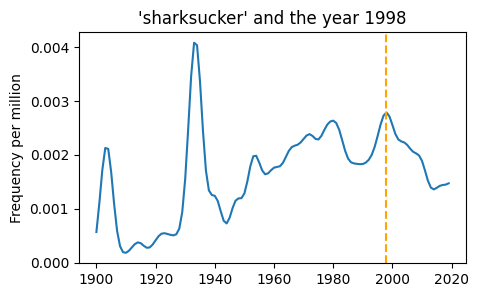

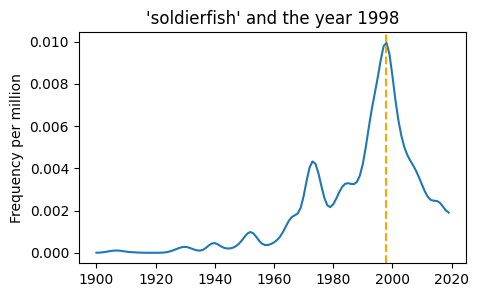

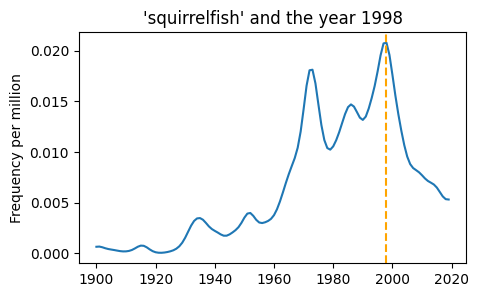

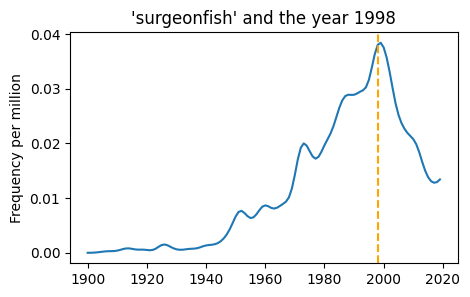

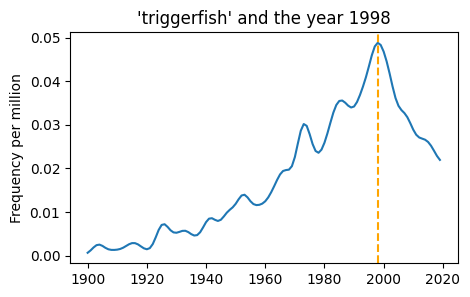

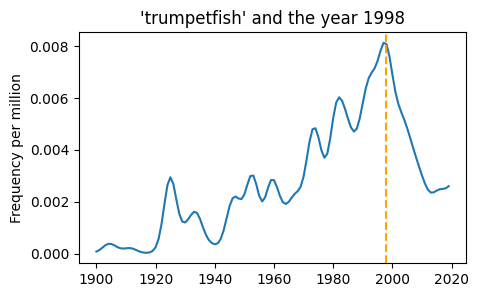

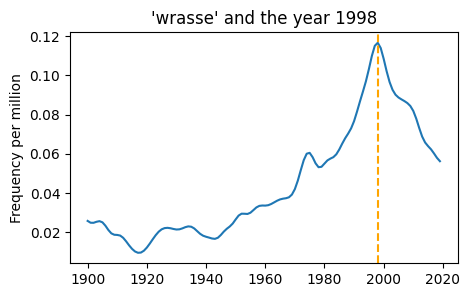

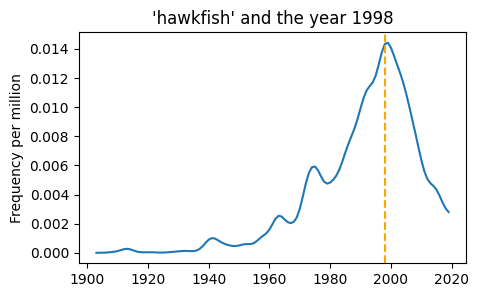

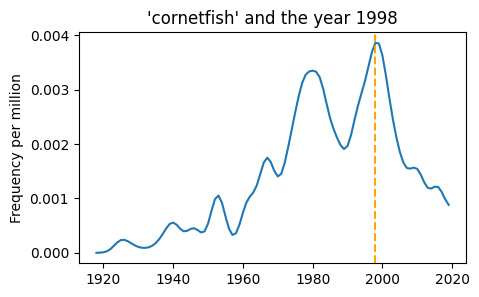

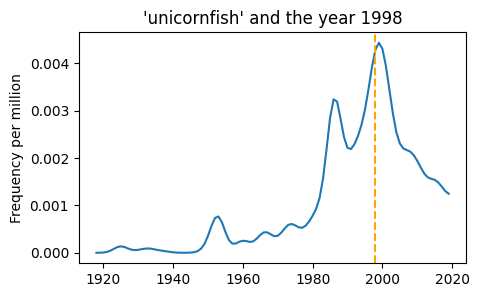

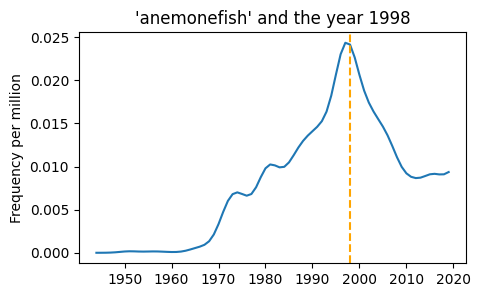

In [5]:
for word in word_list:
    plot_word_trend(word)

### Possible Explanatory Mechanism 1: Coral Bleaching

Coral bleaching occurs when coral reefs lose their vibrant colors and turn white, primarily from warm ocean temperatures. This stress causes corals to expel the essential algae, zooxanthellae, which provide them with food and color. Prolonged warm conditions can lead to coral starvation and death.

Researchers studied coral bleaching events at 100 locations across 54 countries from 1980 to 2016. The file `bleaching-reefs.csv` documents these events. Bleaching is classified as severe (`S`) if over 30% of coral colonies are affected across large areas and moderate (`M`) if 1-30% of colonies are affected at multiple sites at that location.

In [6]:
bleaching_reefs = pd.read_csv('bleaching-reefs.csv')
bleaching_reefs

,location,year,severity
0,"Australia, Coral Sea Northern",1998,S
1,"Australia, Coral Sea Northern",2002,S
2,"Australia, Coral Sea Northern",2004,M
3,"Australia, Coral Sea Northern",2016,S
4,"Australia, Coral Sea Southern",2016,M
...,...,...,...
604,Venezuela,1995,M
605,Venezuela,1998,M
606,Venezuela,2005,M
607,Venezuela,2006,M


- Use `df.groupby()` to count how many locations experienced coral bleaching each year.

In [7]:
yearly_bleach_locations_nb = bleaching_reefs.groupby('year')['location'].count().reset_index()
yearly_bleach_locations_nb

,year,location
0,1980,5
1,1981,2
2,1982,1
3,1983,22
4,1984,2
5,1985,2
6,1986,4
7,1987,26
8,1988,11
9,1989,4


- Create a bar chart to show the total number of bleaching events per year.

Text(0.5, 0, 'Years')

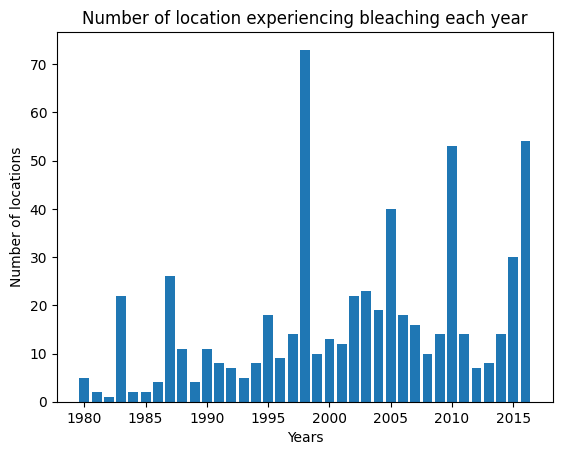

In [8]:
plt.bar(yearly_bleach_locations_nb['year'], yearly_bleach_locations_nb['location'])
plt.title('Number of location experiencing bleaching each year')
plt.ylabel('Number of locations')
plt.xlabel('Years')

- Use `df.query()` and `df.groupby()` to make another bar chart displaying the number of `severe` bleaching events each year.

Text(0.5, 0, 'Years')

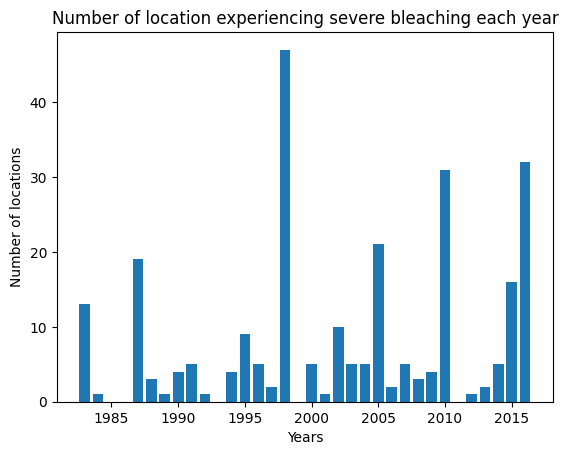

In [9]:
severe = bleaching_reefs.query('severity == "S"')
severe_count = severe.groupby('year')['location'].count().reset_index()
plt.bar(severe_count['year'], severe_count['location'])
plt.title('Number of location experiencing severe bleaching each year')
plt.ylabel('Number of locations')
plt.xlabel('Years')

- What do you notice about the data? How might coral bleaching be related to the decrease in word frequency for these fish species?

&rarr; Not related

- **Coral Cover Data:** The dataset from  `global-coral-cover.csv` shows the average percentage of coral reefs covered by live coral each year. A healhty reef has more live coral, as opposed to substrates such as sand, dead coral, and algae.

- **SCUBA Certifications**: The dataset from  `new-scuba-certifications.csv` shows how many people get SCUBA certified each year. This certification is a prerequisite for dive tours. 

In [10]:
coral_cover = pd.read_csv('global-coral-cover.csv')
coral_cover.head(2)

,year,percent_coral
0,1978,32.34
1,1979,32.30


In [11]:
scuba = pd.read_csv('new-scuba-certifications.csv')
scuba.head(2)

,year,num_new_certifications
0,1967,3226
1,1968,8442


### Possible Explanatory Mechanism 2: The Internet Effect

Google was founded in 1998, which may have led to fewer fish identification books being published as more information became available online. FishBase, launched in 1998, is one example of such a resource.

Other relevent websites include:

| Year | Website                     |
|------|-----------------------------|
| 1998 | http://fishbase.org/        |
| 1997 | http://bms.bc.ca/           |
| 1998 | http://aquariumfish.com/    |
| 1996 | http://scubadiving.com/     |
| 1999 | http://saltaquarium.com/    |
| 1998 | http://marinefish.net/      |
| 1999 | http://saltwaterfish.com/   |
| 1998 | http://ncaquariums.com/     |
| 1997 | http://seattleaquarium.org/ |
| 1998 | http://londonaquarium.co.uk/|
| 1999 | http://newportaquarium.com/ |

The book "Reef Fish Identification, Tropical Pacific" is a well-known guide for identifying coral reef fish.

The file `reef-fish-identification-book.csv` lists the number of species covered in the book for each type of fish. For instance, it includes identification details for 49 species of angelfish.

In [12]:
fish_id = pd.read_csv('reef-fish-identification-book.csv')
fish_id.head()

,word,num_species_in_book
0,anemonefish,20
1,angelfish,49
2,bannerfish,7
3,blenny,64
4,butterflyfish,63


- Use `df.query()` to determine the `frequency per million` of each fish name in `1998`.

In [13]:
df_1998 = df.query('year == 1998').sort_values('word')
df_1998 

,year,word,frequency
2539,1998,anemonefish,0.024134
2540,1998,angelfish,0.139240
2541,1998,bannerfish,0.004208
2542,1998,blenny,0.078351
2543,1998,butterflyfish,0.055496
2544,1998,cornetfish,0.003866
2545,1998,damselfish,0.059589
2546,1998,filefish,0.019828
2547,1998,frogfish,0.015598
2548,1998,goatfish,0.031478


- Merge these results with the identification guide dataset (`fish_id`).

In [14]:
df_1998 = df_1998.merge(fish_id, on='word').drop(columns='year')
df_1998 

,word,frequency,num_species_in_book
0,anemonefish,0.024134,20
1,angelfish,0.139240,49
2,bannerfish,0.004208,7
3,blenny,0.078351,64
4,butterflyfish,0.055496,63
5,cornetfish,0.003866,1
6,damselfish,0.059589,75
7,filefish,0.019828,25
8,frogfish,0.015598,16
9,goatfish,0.031478,22


- Build a linear model to examine the relationship between the `number of species` listed in the book and the `frequency per million` of each fish name.

LinearModel():
Slope: 0.0010183062587083552
Intercept: 0.007997103703284911
R-squared: 0.6573764148175836


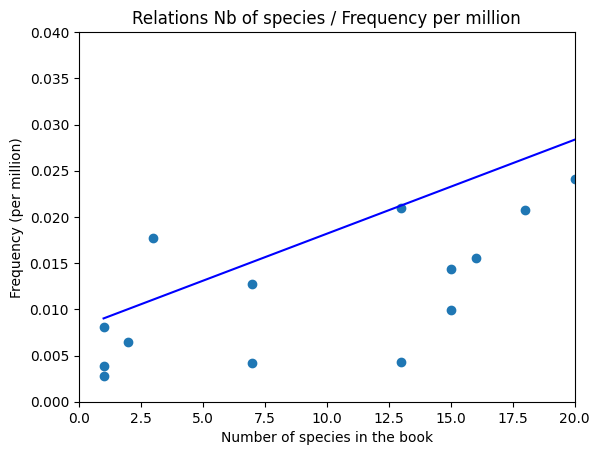

In [29]:
plt.scatter(df_1998['num_species_in_book'], df_1998['frequency'])
plt.title('Relations Nb of species / Frequency per million')
plt.xlabel('Number of species in the book')
plt.ylabel('Frequency (per million)')
plt.xlim(0,20)
plt.ylim(0,0.04)

model_trend = LinearModel()
model_trend.fit(df_1998['num_species_in_book'], df_1998['frequency'])
model_trend.plot_model(df_1998['num_species_in_book'].min(), df_1998['num_species_in_book'].max(), 'blue')
model_trend.print_model_info()

#### Questions to Consider
- What patterns emerge from the data? 

    &rarr; A positive relation, the slope is positive.

- Does the analysis suggest that fish identification guides have historically influenced the fish name’s frequency in written records? 
    
    &rarr; Yes, slightly, given the r2_score which is under 70 %.

- If printed fish identification guides became less popular with the rise of the internet, how might the frequency of coral reef fish names in literature change? 


    &rarr; The prediction shows no variation in frequeny in case of less number of species listed in the book. The growing usage of Internet can explain that the printed guide becomes less justified as an explanatory cause for the frequency situation. 